<a href="https://colab.research.google.com/github/Amrith-ops/Identify-the-Sentiment/blob/master/Implementing%20Backpropagation%20with%20different%20optimizers%20without%20Keras/Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='red'>BackPropagation</font>

**There will be some functions that start with the word "grader" ex: grader_sigmoid(), grader_forwardprop(), grader_backprop() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

## <font color='red'>Loading data </font>

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pickle
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import math
with open('/content/drive/My Drive/Copy of data.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)
X = data[:, :5]
y = data[:, -1]
print(X.shape, y.shape)

In [ ]:
X[0,:]

array([-1.2879095 , -0.12001342, -1.45900038, -0.66660821, -0.14421743])

# <font color='red'>Computational graph</font>

<img src='https://i.imgur.com/seSGbNS.png'>


*  **If you observe the graph, we are having input features [f1, f2, f3, f4, f5] and 9 weights [w1, w2, w3, w4, w5, w6,    w7, w8, w9]**.<br><br>
*  **The final output of this graph is a value L which is computed as (Y-Y')^2** 

# <font color='red'>Task 1: Implementing backpropagation and Gradient checking </font>

<font color='blue'><b>Check this video for better understanding of the computational graphs and back propagation</font>

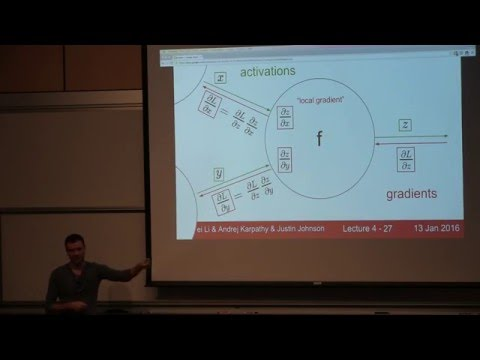

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('i94OvYb6noo',width="1000",height="500")


*  <b>Write two functions<br>
    *  Forward propagation</b>(Write your code in<font color='blue'> def forward_propagation()</b></font>)<br><br>
    For easy debugging, we will break the computational graph into 3 parts.

    <font color='green'><b>Part 1</b></font></b>
    <img src='https://i.imgur.com/0xUaxy6.png'><br><br>
    <font color='green'><b>Part 2</b></font></b><br>
    <img src='https://i.imgur.com/J29pAJL.png'><br><br>
    <font color='green'><b>Part 3</b></font></b>
    <img src='https://i.imgur.com/vMyCsd9.png'>

    <pre>
    <font color='green'>
def forward_propagation(X, y, W):
        <font color='grey'>
        # X: input data point, note that in this assignment you are having 5-d data points
        # y: output varible
        # W: weight array, its of length 9, W[0] corresponds to w1 in graph, W[1] corresponds to w2 in graph, <br>         ..., W[8] corresponds to w9 in graph.  
        # you have to return the following variables
        # exp= part1 (compute the forward propagation until exp and then store the values in exp)
        # tanh =part2(compute the forward propagation until tanh and then store the values in tanh)
        # sig = part3(compute the forward propagation until sigmoid and then store the values in sig)
        # now compute remaining values from computional graph and get y'
        # write code to compute the value of L=(y-y')^2
        # compute derivative of L  w.r.to Y' and store it in dl
        # Create a dictionary to store all the intermediate values
        # store L, exp,tanh,sig,dl variables
        </font>
        return (dictionary, which you might need to use for back propagation)
        <font color='grey'>
        </font>
</font>
</pre>
    *  <b>Backward propagation</b>(Write your code in<font color='blue'> def backward_propagation()</b></font>)
    </b>
    <pre>
    <font color='green'>
    def backward_propagation(L, W,dictionary):
        <font color='grey'>
        # L: the loss we calculated for the current point
        # dictionary: the outputs of the forward_propagation() function
        # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
        # Hint: you can use dict type to store the required variables 
        # return dW, dW is a dictionary with gradients of all the weights
        </font>
        return dW
        </font>
</font>
</pre>

 ## <font color='red'>Gradient clipping</font>

<b> Check this  <a href='https://towardsdatascience.com/how-to-debug-a-neural-network-with-gradient-checking-41deec0357a9'>blog link</a> for more details on Gradient clipping

 we know that the derivative of any function is
 
 $$\lim_{\epsilon\to0}\frac{f(x+\epsilon)-f(x-\epsilon)}{2\epsilon}$$


*  The definition above can be used as a numerical approximation of the derivative. Taking an epsilon small enough, the calculated approximation will have an error in the range of epsilon squared. 

*  In other words, if epsilon is 0.001, the approximation will be off by 0.00001.

Therefore, we can use this to approximate the gradient, and in turn make sure that backpropagation is implemented properly. This forms the basis of <b>gradient checking!</b>

## <Font color='blue'>Gradient checking example</font>

<font >
lets understand the concept with a simple example:
$f(w1,w2,x1,x2)=w_{1}^{2} . x_{1} + w_{2} . x_{2}$ 

from the above function , lets assume $w_{1}=1$, $w_{2}=2$, $x_{1}=3$, $x_{2}=4$ the gradient of $f$ w.r.t $w_{1}$ is

\begin{array} {lcl}
\frac{df}{dw_{1}} = dw_{1} &=&2.w_{1}.x_{1} \\& = &2.1.3\\& = &6
\end{array}


let calculate the aproximate gradient of $w_{1}$ as mentinoned in the above formula and considering $\epsilon=0.0001$

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((1+0.0001)^{2} . 3 + 2 . 4) - ((1-0.0001)^{2} . 3 + 2 . 4)}{2\epsilon} \\ & = & \frac{(1.00020001 . 3 + 2 . 4) - (0.99980001. 3 + 2 . 4)}{2*0.0001} \\ & = & \frac{(11.00060003) - (10.99940003)}{0.0002}\\ & = & 5.99999999999
\end{array}

Then, we apply the following formula for gradient check: <i>gradient_check</i> = 
$\frac{\left\Vert\left (dW-dW^{approx}\rm\right) \right\Vert_2}{\left\Vert\left (dW\rm\right) \right\Vert_2+\left\Vert\left (dW^{approx}\rm\right) \right\Vert_2}$

The equation above is basically the Euclidean distance normalized by the sum of the norm of the vectors. We use normalization in case that one of the vectors is very small.
As a value for epsilon, we usually opt for 1e-7. Therefore, if gradient check return a value less than 1e-7, then it means that backpropagation was implemented correctly. Otherwise, there is potentially a mistake in your implementation. If the value exceeds 1e-3, then you are sure that the code is not correct.

in our example: <i>gradient_check</i> $ = \frac{(6 - 5.999999999994898)}{(6 + 5.999999999994898)} = 4.2514140356330737e^{-13}$

you can mathamatically derive the same thing like this

\begin{array} {lcl}
dw_1^{approx} & = & \frac{f(w1+\epsilon,w2,x1,x2)-f(w1-\epsilon,w2,x1,x2)}{2\epsilon} \\ & = & \frac{((w_{1}+\epsilon)^{2} . x_{1} + w_{2} . x_{2}) - ((w_{1}-\epsilon)^{2} . x_{1} + w_{2} . x_{2})}{2\epsilon} \\ & = & \frac{4. \epsilon.w_{1}. x_{1}}{2\epsilon} \\ & = &  2.w_{1}.x_{1}
\end{array}


## <font color='red'> Implement Gradient checking </font> <br>
 (Write your code in <font color='blue'> def gradient_checking()</font>)

**Algorithm** 



<pre>
<font color='darkblue'>
W = initilize_randomly
def gradient_checking(data_point, W):<font color='grey'>
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()</font>
    approx_gradients = []
    for each wi weight value in W:<font color='grey'>
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi</font>
        approx_gradients.append(approximation gradients of weight wi)<font color='grey'>
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with <br>  gradient_check formula</font>
    return gradient_check</font>
<b>NOTE: you can do sanity check by checking all the return values of gradient_checking(),<br> they have to be zero. if not you have bug in your code
</pre></b>

# <font color='red'> Task 2 : Optimizers </font>

* As a part of this task, you will be implementing 3 type of optimizers(methods to update weight)
* Use the same computational graph that was mentioned above to do this task
* Initilze the 9 weights from normal distribution with mean=0 and std=0.01

**Check below video and <a href='https://cs231n.github.io/neural-networks-3/'>this</a> blog**

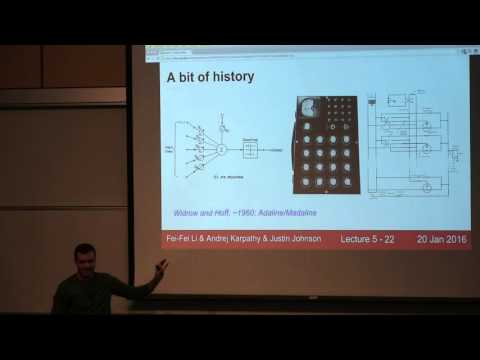

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('gYpoJMlgyXA',width="1000",height="500")

<font color='blue'><b>Algorithm</b>

<pre>
    for each epoch(1-100):
        for each data point in your data:
            using the functions forward_propagation() and backword_propagation() compute the gradients of weights
            update the weigts with help of gradients  ex: w1 = w1-learning_rate*dw1
</pre>

## <font color='red'> Implement below tasks</b>


*  <b>Task 2.1</b>: you will be implementing the above algorithm with <b>Vanilla update</b> of weights<br><br>
*  <b>Task 2.2</b>: you will be implementing the above algorithm with <b>Momentum update</b> of weights<br><br>
*  <b>Task 2.3</b>: you will be implementing the above algorithm with <b>Adam update</b> of weights



**Note : If you get any assertion error while running grader functions, please print the variables in grader functions and check which variable is returning False .Recheck your logic for that variable .**

<br>
<br>
<br>

# <font color='red'>Task 1 </font>

## <font color='blue'>Forward propagation </font>

In [1]:
def sigmoid(a):
  return(1/(1+np.exp(-a)))

In [2]:
def forward_propogation(X,y,w,One):
  param={}
  norm=((w[0]*X[0]+w[1]*X[1])*(w[0]*X[0]+w[1]*X[1])+w[5])
  exp=math.exp(norm)
  param['exp']=exp
  tan=math.tanh(exp+w[6])
  param['tanh']=tan
  sigma=sigmoid((math.sin(w[2]*X[2])*(w[3]*X[3]+w[4]*X[4]))+w[7])
  param['sigmoid']=sigma
  norm1=sigma*w[8]
  y_pred=tan+norm1
  loss=(y-y_pred)**2
  param['loss']=loss
  dL=-2*(y-y_pred)
  param['dl']=dL
  if One:
    return(param,y_pred,loss)
  else:
    return(loss,y_pred)

In [3]:
def backward_propogation(y_pred,X,y,w,eta):
  W=np.zeros(9)
  dw={}
  O_1=w[0]*X[0]
  O_3=w[1]*X[1]
  O_0=O_1+O_3
  O_2=O_1+O_3
  O1=w[0]**2*X[0]**2+w[1]**2*X[1]**2+2*w[0]*w[1]*X[0]*X[1]
  O2=O1+w[5]
  O3=math.exp(O2)
  O4=O3+w[6]
  O5=math.tanh(O4)
  L1=w[2]*X[2]
  L2=math.sin(L1)
  L3=w[3]*X[3]+w[4]*X[4]
  L4=L3*L2
  L5=L4+w[7]
  L6=sigmoid(L5)
  L7=L6*w[8]
  L8=w[3]*X[3]
  L9=w[4]*X[4]
  gradient_w7=-2*(y-y_pred)*(1-(math.tanh(O4))**2)
  dw['dw7']=gradient_w7
  w7=w[6]-eta*gradient_w7
  W[6]=w7
  gradient_w6=gradient_w7*math.exp(O2)
  dw['dw6']=gradient_w6
  w6=w[5]-eta*gradient_w6
  W[5]=w6
  gradient_w9=-2*(y-y_pred)*sigmoid(L5)
  dw['dw9']=gradient_w9
  w9=w[8]-eta*gradient_w9
  W[8]=w9
  gradient_w8=gradient_w9*(1-sigmoid(L5))*w9
  dw['dw8']=gradient_w8
  w8=w[7]-eta*gradient_w8
  W[7]=w8
  gradient_w3=gradient_w8*L3*math.cos(L1)*X[2]
  dw['dw3']=gradient_w3
  w3=w[2]-eta*gradient_w3
  W[2]=w3
  gradient_w4=gradient_w8*L2*X[3]
  dw['dw4']=gradient_w4
  w4=w[3]-eta*gradient_w4
  W[3]=w4
  gradient_w5=gradient_w8*L2*X[4]
  dw['dw5']=gradient_w5
  w5=w[4]-eta*gradient_w5
  W[4]=w3
  gradient_w1=gradient_w6*O_0*2*X[0]
  dw['dw1']=gradient_w1
  w1=w[0]-eta*gradient_w1
  W[0]=w1
  gradient_w2=gradient_w6*O_0*2*X[1]
  dw['dw2']=gradient_w2
  w2=w[1]-eta*gradient_w2
  W[1]=w2
  return(W,dw)

In [ ]:
w=np.ones(9)*0.1
eta=0.001
param,y_pred=forward_propogation(X[0,:],data[0,-1],w,True)
W,dw=backward_propogation(y_pred,X[0,:],data[0,-1],w,eta)

In [ ]:
print(param)

{'exp': 1.1272967040973583, 'tanh': 0.8417934192562146, 'sigmoid': 0.5279179387419721, 'loss': 0.9298048963072919, 'dl': -1.9285278284819143}


<font color='cyan'>Grader function - 1</font>

In [ ]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

<font color='cyan'>Grader function - 2 </font>

In [ ]:
def grader_forwardprop(data):
    dl = (np.round(data['dl'],4)==-1.9285)
    loss=(np.round(data['loss'],4)==0.9298)
    part1=(np.round(data['exp'],4)==1.1273)
    part2=(np.round(data['tanh'],4)==0.8418)
    part3=(np.round(data['sigmoid'],4)==0.5279)
    assert(dl and loss and part1 and part2 and part3)
    return True
w=np.ones(9)*0.1
d1,y_pred=forward_propogation(X[0],y[0],w,True)
grader_forwardprop(d1)

True

## <font color='blue'>Backward propagation</font>

In [ ]:
def backward_propagation(L,W,dict):
    '''In this function, we will compute the backward propagation '''
    # L: the loss we calculated for the current point
    # dictionary: the outputs of the forward_propagation() function
    # write code to compute the gradients of each weight [w1,w2,w3,...,w9]
    # Hint: you can use dict type to store the required variables 
    # dw1 = # in dw1 compute derivative of L w.r.to w1
    # dw2 = # in dw2 compute derivative of L w.r.to w2
    # dw3 = # in dw3 compute derivative of L w.r.to w3
    # dw4 = # in dw4 compute derivative of L w.r.to w4
    # dw5 = # in dw5 compute derivative of L w.r.to w5
    # dw6 = # in dw6 compute derivative of L w.r.to w6
    # dw7 = # in dw7 compute derivative of L w.r.to w7
    # dw8 = # in dw8 compute derivative of L w.r.to w8
    # dw9 = # in dw9 compute derivative of L w.r.to w9

    # return dW, dW is a dictionary with gradients of all the weights

<font color='cyan'>Grader function - 3 </font>

In [ ]:
def grader_backprop(data):
    dw1=(np.round(data['dw1'],4)==-0.2297)
    dw2=(np.round(data['dw2'],4)==-0.0214)
    dw3=(np.round(data['dw3'],4)==-0.0056)
    dw4=(np.round(data['dw4'],4)==-0.0047)
    dw5=(np.round(data['dw5'],4)==-0.001)
    dw6=(np.round(data['dw6'],4)==-0.6335)
    dw7=(np.round(data['dw7'],4)==-0.5619)
    dw8=(np.round(data['dw8'],4)==-0.0481)
    dw9=(np.round(data['dw9'],4)==-1.0181)
    assert(dw1 and dw2 and dw3 and dw4 and dw5 and dw6 and dw7 and dw8 and dw9)
    return True 

grader_backprop(dw)

In [ ]:
dw

{'dw1': -0.22973323498702,
 'dw2': -0.02140761471775293,
 'dw3': -0.005682678084023055,
 'dw4': -0.004705363928928002,
 'dw5': -0.0010179825208945972,
 'dw6': -0.6334751873437471,
 'dw7': -0.561941842854033,
 'dw8': -0.04855221442799258,
 'dw9': -1.0181044360187037}

## <font color='blue'> Implement gradient checking</font>

In [ ]:
W = initilize_randomly
def gradient_checking(data_point, W):
    # compute the L value using forward_propagation()
    # compute the gradients of W using backword_propagation()
    approx_gradients = []
    for each wi weight value in W:
        # add a small value to weight wi, and then find the values of L with the updated weights
        # subtract a small value to weight wi, and then find the values of L with the updated weights
        # compute the approximation gradients of weight wi
        approx_gradients.append(approximation gradients of weight wi)
    # compare the gradient of weights W from backword_propagation() with the aproximation gradients of weights with gradient_check formula
    return gradient_check

In [ ]:
W=np.ones(9)*0.1
def gradient_checking(X,y,W,dw):
  approx=[]
  for i,weight in enumerate(W):
    W=np.ones(9)*0.1
    np.put(W,i,W[i]+0.001)
    add_loss=forward_propogation(X,y,W,False)
    W=np.ones(9)*0.1
    W[i]=W[i]-0.002
    subtract_loss=forward_propogation(X,y,W,False)
    a=(add_loss[0]-subtract_loss[0])/(0.002)
    b=dw['dw{}'.format(i+1)]
    check=(b-a)/(b+a)
    approx.append(check)
  return(approx)

approx=gradient_checking(X[0,:],data[0,-1],W,dw)

In [ ]:
print(approx)

[-0.1979039268557396, -0.19980539254318458, -0.19518625996961111, -0.19513482203204632, -0.19513333128714258, -0.2002969220469977, -0.2004772071744033, -0.19515244377303814, -0.2001313743021651]


# <font color='red'>Task 2: Optimizers

###<font color='blue'>Algorithm with Vanilla update of weights</font>

In [ ]:
from tqdm import tqdm
W=np.ones(9)*0.1
loss_list=[]
for i in tqdm(range(15)):
  loss=0
  for j in data:
    X=j[:5]
    y=j[-1]
    eta=0.001
    Loss,y_pred=forward_propogation(X,y,W,One=False)
    loss=loss+Loss
    W,dw=backward_propogation(y_pred,X,y,W,eta)
  loss_list.append(loss/data.shape[0])

100%|██████████| 15/15 [00:00<00:00, 53.03it/s]


In [ ]:
print(loss_list)

[0.5485998620078091, 0.2653769098177815, 0.13566897873460246, 0.07358508573453544, 0.04553772688924872, 0.033617350290884154, 0.028699762737262893, 0.026584510610626375, 0.025498570712961657, 0.024742858504956815, 0.024058111862744043, 0.02335538186670113, 0.022608800333377806, 0.02181499518314853, 0.020978419903962507]


<font color='blue'>Plot between epochs and loss</font>

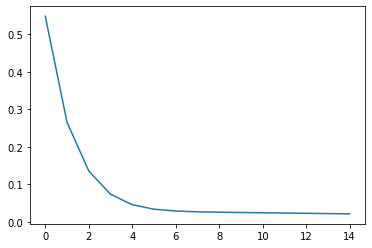

In [ ]:
plt.plot(np.arange(15),loss_list)

###<font color='blue'>Algorithm with Vanilla update of weights</font>

In [ ]:
def backward_propogation_moment(y_pred,X,y,w,Update,eta,gamma):
  W=np.zeros(9)
  update=np.zeros(9)
  dw={}
  O_1=w[0]*X[0]
  O_3=w[1]*X[1]
  O_0=O_1+O_3
  O_2=O_1+O_3
  O1=w[0]**2*X[0]**2+w[1]**2*X[1]**2+2*w[0]*w[1]*X[0]*X[1]
  O2=O1+w[5]
  O3=math.exp(O2)
  O4=O3+w[6]
  O5=math.tanh(O4)
  L1=w[2]*X[2]
  L2=math.sin(L1)
  L3=w[3]*X[3]+w[4]*X[4]
  L4=L3*L2
  L5=L4+w[7]
  L6=sigmoid(L5)
  L7=L6*w[8]
  L8=w[3]*X[3]
  L9=w[4]*X[4]
  gradient_w7=-2*(y-y_pred)*(1-(math.tanh(O4))**2)
  dw['dw7']=gradient_w7
  w7=w[6]-eta*gradient_w7-Update[6]
  W[6]=w7
  update_w7=gamma*gradient_w7
  update[6]=update_w7
  gradient_w6=gradient_w7*math.exp(O2)
  dw['dw6']=gradient_w6
  w6=w[5]-eta*gradient_w6-Update[5]
  W[5]=w6
  update_w6=gamma*gradient_w6
  update[5]=update_w6
  gradient_w9=-2*(y-y_pred)*sigmoid(L5)
  dw['dw9']=gradient_w9
  w9=w[8]-eta*gradient_w9-Update[8]
  W[8]=w9
  update_w9=gamma*gradient_w9
  update[8]=update_w9
  gradient_w8=gradient_w9*(1-sigmoid(L5))*w9
  dw['dw8']=gradient_w8
  w8=w[7]-eta*gradient_w8-Update[7]
  W[7]=w8
  update_w8=gamma*gradient_w8
  update[7]=update_w8
  gradient_w3=gradient_w8*L3*math.cos(L1)*X[2]
  dw['dw3']=gradient_w3
  w3=w[2]-eta*gradient_w3-Update[2]
  W[2]=w3
  update_w3=gamma*gradient_w3
  update[2]=update_w3
  gradient_w4=gradient_w8*L2*X[3]
  dw['dw4']=gradient_w4
  w4=w[3]-eta*gradient_w4-Update[3]
  W[3]=w4
  update_w4=gamma*gradient_w4
  update[3]=update_w4
  gradient_w5=gradient_w8*L2*X[4]
  dw['dw5']=gradient_w5
  w5=w[4]-eta*gradient_w5-Update[4]
  W[4]=w3
  update_w5=gamma*gradient_w5
  update[4]=update_w5
  gradient_w1=gradient_w6*O_0*2*X[0]
  dw['dw1']=gradient_w1
  w1=w[0]-eta*gradient_w1-Update[0]
  W[0]=w1
  update_w1=gamma*gradient_w1
  update[0]=update_w1
  gradient_w2=gradient_w6*O_0*2*X[1]
  dw['dw2']=gradient_w2
  w2=w[1]-eta*gradient_w2-Update[1]
  W[1]=w2
  update_w2=gradient_w2*gamma
  update[1]=update_w2
  return(W,dw,update)

In [ ]:
from tqdm import tqdm
W=np.ones(9)*0.1
update=np.zeros(9)
loss_list1=[]
epoch=0
for i in tqdm(range(15)):
  epoch+=1
  print(epoch)
  loss=0
  for j in data:
    X=j[:5]
    y=j[-1]
    eta=0.001
    Loss,y_pred=forward_propogation(X,y,W,One=False)
    loss=loss+Loss
    W,dw,update=backward_propogation_moment(y_pred,X,y,W,update,eta,0.9)
  loss_list1.append(loss/data.shape[0])

In [ ]:
print(loss_list1)

[0.02984841920957355, 0.024125497503976346, 0.022792212430846323, 0.02255509977891266, 0.022492987217410568, 0.022476524648893777, 0.022471743879487752, 0.02247002238216113, 0.022469206215328223, 0.022468722922231992, 0.02246839724153909, 0.02246816184910817, 0.02246798383912799, 0.022467844183955473, 0.02246773088191093]


<font color='blue'>Plot between epochs and loss</font>

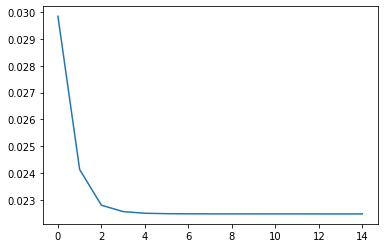

In [ ]:
plt.plot(list(range(15)),loss_list1)

###<font color='blue'>Algorithm with Vanilla update of weights</font>

In [ ]:
def backward_propogation_adam(y_pred,X,y,w,eta,m,v,beta1,beta2):
  W=np.zeros(9)
  M=np.zeros(9)
  V=np.zeros(9)
  dw={}
  O_1=w[0]*X[0]
  O_3=w[1]*X[1]
  O_0=O_1+O_3
  O_2=O_1+O_3
  O1=w[0]**2*X[0]**2+w[1]**2*X[1]**2+2*w[0]*w[1]*X[0]*X[1]
  O2=O1+w[5]
  O3=math.exp(O2)
  O4=O3+w[6]
  O5=math.tanh(O4)
  L1=w[2]*X[2]
  L2=math.sin(L1)
  L3=w[3]*X[3]+w[4]*X[4]
  L4=L3*L2
  L5=L4+w[7]
  L6=sigmoid(L5)
  L7=L6*w[8]
  L8=w[3]*X[3]
  L9=w[4]*X[4]
  gradient_w7=-2*(y-y_pred)*(1-(math.tanh(O4))**2)
  dw['dw7']=gradient_w7
  w7=w[6]-(eta/math.sqrt(v[6]+0.01))*m[6]
  W[6]=w7
  m_7=beta1*m[6]+(1-beta1)*gradient_w7
  M[6]=m_7
  v_7=beta2*v[6]+(1-beta2)*(gradient_w7)**2
  V[6]=v_7
  gradient_w6=gradient_w7*math.exp(O2)
  dw['dw6']=gradient_w6
  w6=w[5]-(eta/(math.sqrt(v[5]+0.01)))*m[5]
  W[5]=w6
  m_6=beta1*m[5]+(1-beta1)**gradient_w6
  M[5]=m_6
  v_6=beta2*v[5]+(1-beta2)*(gradient_w6)**2
  V[5]=v_6
  gradient_w9=-2*(y-y_pred)*sigmoid(L5)
  dw['dw9']=gradient_w9
  w9=w[8]-(eta/(math.sqrt(v[8]+0.01)))*m[8]
  W[8]=w9
  m_9=beta1*m[8]+(1-beta1)*gradient_w9
  M[8]=m_9
  v_9=beta2*v[8]+(1-beta2)*(gradient_w9)**2
  V[8]=v_9
  gradient_w8=gradient_w9*(1-sigmoid(L5))*w9
  dw['dw8']=gradient_w8
  w8=w[7]-(eta/(math.sqrt(v[7]+0.01)))*m[7]
  W[7]=w8
  m_8=beta1*m[7]+(1-beta1)*gradient_w8
  M[7]=m_8
  v_8=beta2*v[7]+(1-beta2)*(gradient_w8)**2
  V[7]=v_8
  gradient_w3=gradient_w8*L3*math.cos(L1)*X[2]
  dw['dw3']=gradient_w3
  w3=w[2]-(eta/(math.sqrt(v[2]+0.01)))*m[2]
  W[2]=w3
  m_3=beta1*m[2]+(1-beta1)*gradient_w3
  M[2]=m_3
  v_3=beta1*v[2]+(1-beta1)*(gradient_w3)**2
  V[2]=v_3
  gradient_w4=gradient_w8*L2*X[3]
  dw['dw4']=gradient_w4
  w4=w[3]-(eta/(math.sqrt(v[3]+0.01)))*m[3]
  W[3]=w4
  m_4=beta1*m[3]+(1-beta1)*gradient_w4
  M[3]=m_4
  v_4=beta2*v[3]+(1-beta2)*(gradient_w4)**2
  V[3]=v_4
  gradient_w5=gradient_w8*L2*X[4]
  dw['dw5']=gradient_w5
  w5=w[4]-(eta/(math.sqrt(v[4]+0.01)))*m[4]
  W[4]=w3
  m_5=beta1*m[4]+(1-beta1)*gradient_w5
  M[4]=m_5
  v_5=beta2*v[4]+(1-beta2)*(gradient_w5)**2
  V[4]=v_5
  gradient_w1=gradient_w6*O_0*2*X[0]
  dw['dw1']=gradient_w1
  w1=w[0]-(eta/(math.sqrt(v[0]+0.01)))*m[0]
  W[0]=w1
  m_1=beta1*m[0]+(1-beta1)*gradient_w1
  M[0]=m_1
  v_1=beta2*v[0]+(1-beta2)*(gradient_w1)**2
  V[0]=v_1
  gradient_w2=gradient_w6*O_0*2*X[1]
  dw['dw2']=gradient_w2
  w2=w[1]-(eta/math.sqrt(v[1]+0.01))*m[1]
  W[1]=w2
  m_2=beta1*m[1]+(1-beta1)*gradient_w2
  M[1]=m_2
  v_2=beta2*v[1]+(1-beta2)*(gradient_w2)**2
  V[1]=v_2
  return(W,dw,M,V)

In [ ]:
from tqdm import tqdm
W=np.ones(9)*0.1
M=np.zeros(9)
V=np.zeros(9)
loss_list2=[]
epoch=0
for i in tqdm(range(15)):
  epoch+=1
  print(epoch)
  loss=0
  for j in data:
    X=j[:5]
    y=j[-1]
    eta=0.001
    Loss,y_pred=forward_propogation(X,y,W,One=False)
    loss=loss+Loss
    W,dw,M,V=backward_propogation_adam(y_pred,X,y,W,eta,M,V,0.95,0.95)
  loss_list2.append(loss/data.shape[0])

In [ ]:
print(loss_list2)

[1.5905192367054888, 0.3204984005164726, 0.017765140400216893, 0.010960765589606439, 0.006465246753778289, 0.0036456132859184753, 0.002182130492975015, 0.00145535795280602, 0.0010865075830945536, 0.0008950587351588935, 0.0007940181671698351, 0.0007393516750422043, 0.0007081135445208998, 0.0006882571683195539, 0.0006735298328854235]


<font color='blue'>Plot between epochs and loss</font>

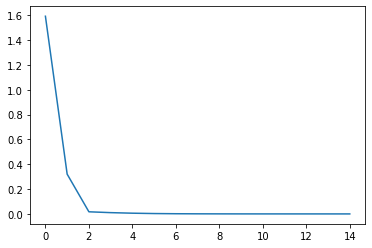

In [ ]:
plt.plot(list(range(15)),loss_list2)

<font color='blue'>Comparision plot between epochs and loss with different optimizers</font>

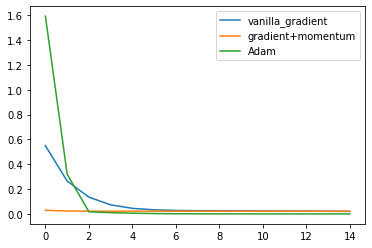

In [ ]:
plt.plot(list(range(15)),loss_list,label='vanilla_gradient')
plt.plot(list(range(15)),loss_list1,label='gradient+momentum')
plt.plot(list(range(15)),loss_list2,label='Adam')
plt.legend()
plt.show()